In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('Users/Guest_user/Downloads'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings 
from warnings import filterwarnings
filterwarnings("ignore")

In [4]:
data= pd.read_csv(r'/Users/Guest_user/Downloads/shrimp_price_dataset.csv')

###DATA CLEANING ### 

In [5]:
data.head()

,Date,Sales Price,Climate_Conditions,Environmental_Events,Holiday_Festive_Demand,Seasonality,Extreme_Events,Global_Supply,Local_Demand,Fuel_Prices,Regulatory_Changes,Competitor_Prices,Consumer_Income_Level,Exchange_Rates,Shrimp_Harvest,Inventory_Levels,COG,Sustainability_Certifications,Technological_Advancements
0,1/1/2024,9.50,Cold,NaN,Medium,Spring,Hurricane,Low,High,3.43,Medium,10.20,Low,1.28,Good,Medium,1.51,Not Certified,Standard
1,1/8/2024,11.80,Warm,NaN,High,Summer,NaN,Medium,Low,2.91,High,8.81,High,1.08,Poor,Low,1.23,Not Certified,Standard
2,1/15/2024,10.93,Cold,Red Tide,Low,Fall,Flood,Low,Low,2.34,Low,10.74,Medium,1.09,Poor,Medium,1.18,Certified,Standard
3,1/22/2024,10.39,Mild,Algal Bloom,Medium,Winter,Hurricane,High,High,3.01,Low,8.35,High,1.43,Poor,Low,1.22,Not Certified,Advanced
4,1/29/2024,8.62,Warm,Algal Bloom,Low,Winter,Hurricane,High,Medium,2.93,High,8.56,Medium,1.47,Moderate,High,1.19,Not Certified,Advanced


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           100 non-null    object 
 1   Shrimp_Price                   100 non-null    float64
 2   Climate_Conditions             100 non-null    object 
 3   Environmental_Events           68 non-null     object 
 4   Holiday_Festive_Demand         100 non-null    object 
 5   Seasonality                    100 non-null    object 
 6   Extreme_Events                 58 non-null     object 
 7   Global_Supply                  100 non-null    object 
 8   Local_Demand                   100 non-null    object 
 9   Fuel_Prices                    100 non-null    float64
 10  Regulatory_Changes             100 non-null    object 
 11  Competitor_Prices              100 non-null    float64
 12  Consumer_Income_Level          100 non-null    obje

In [5]:
data.isnull().sum()

Date                              0
Shrimp_Price                      0
Climate_Conditions                0
Environmental_Events             32
Holiday_Festive_Demand            0
Seasonality                       0
Extreme_Events                   42
Global_Supply                     0
Local_Demand                      0
Fuel_Prices                       0
Regulatory_Changes                0
Competitor_Prices                 0
Consumer_Income_Level             0
Exchange_Rates                    0
Shrimp_Harvest                    0
Inventory_Levels                  0
Processing_Costs                  0
Sustainability_Certifications     0
Technological_Advancements        0
dtype: int64

In [6]:
data.dtypes

Date                              object
Shrimp_Price                     float64
Climate_Conditions                object
Environmental_Events              object
Holiday_Festive_Demand            object
Seasonality                       object
Extreme_Events                    object
Global_Supply                     object
Local_Demand                      object
Fuel_Prices                      float64
Regulatory_Changes                object
Competitor_Prices                float64
Consumer_Income_Level             object
Exchange_Rates                   float64
Shrimp_Harvest                    object
Inventory_Levels                  object
Processing_Costs                 float64
Sustainability_Certifications     object
Technological_Advancements        object
dtype: object

In [8]:
data[data['Environmental_Events'].isnull()]

,Date,Sales Price,Climate_Conditions,Environmental_Events,Holiday_Festive_Demand,Seasonality,Extreme_Events,Global_Supply,Local_Demand,Fuel_Prices,Regulatory_Changes,Competitor_Prices,Consumer_Income_Level,Exchange_Rates,Shrimp_Harvest,Inventory_Levels,COG,Sustainability_Certifications,Technological_Advancements
0,1/1/2024,9.50,Cold,NaN,Medium,Spring,Hurricane,Low,High,3.43,Medium,10.20,Low,1.28,Good,Medium,1.51,Not Certified,Standard
1,1/8/2024,11.80,Warm,NaN,High,Summer,NaN,Medium,Low,2.91,High,8.81,High,1.08,Poor,Low,1.23,Not Certified,Standard
5,2/5/2024,8.62,Mild,NaN,Low,Fall,Hurricane,Low,Low,2.54,Medium,8.01,Low,1.19,Moderate,Medium,1.78,Not Certified,Advanced
12,3/25/2024,11.33,Mild,NaN,High,Fall,Hurricane,Low,High,2.83,Medium,10.98,Medium,1.33,Moderate,Low,1.17,Certified,Advanced
15,4/15/2024,8.73,Mild,NaN,Low,Fall,NaN,Medium,Low,2.61,Low,11.96,High,1.12,Poor,Low,1.70,Not Certified,Advanced
21,5/27/2024,8.56,Cold,NaN,High,Fall,Flood,High,High,2.32,High,11.13,Low,1.33,Poor,High,1.59,Certified,Standard
22,6/3/2024,9.17,Cool,NaN,Medium,Fall,NaN,Low,Medium,2.20,Low,11.31,High,1.12,Moderate,High,1.58,Certified,Standard
25,6/24/2024,11.14,Cool,NaN,High,Spring,Flood,Low,Medium,2.88,Low,11.30,High,1.36,Moderate,High,1.27,Certified,Advanced
34,8/26/2024,11.86,Warm,NaN,High,Fall,NaN,Medium,High,3.29,Low,10.86,High,1.04,Moderate,Low,1.41,Certified,Advanced
35,9/2/2024,11.23,Warm,NaN,High,Spring,Flood,Low,High,3.42,Low,11.60,Medium,1.10,Good,Low,1.37,Certified,Standard


In [6]:
def change_into_Datetime(col):
    data[col] = pd.to_datetime(data[col])

In [7]:
data['Climate_Conditions'].unique()

array(['Cold', 'Warm', 'Mild', 'Cool'], dtype=object)

In [11]:
data['Environmental_Events'].unique()

array([nan, 'Red Tide', 'Algal Bloom'], dtype=object)

In [12]:
data['Holiday_Festive_Demand'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [13]:
data['Seasonality'].unique()

array(['Spring', 'Summer', 'Fall', 'Winter'], dtype=object)

In [14]:
data['Extreme_Events'].unique()

array(['Hurricane', nan, 'Flood'], dtype=object)

In [15]:
data['Global_Supply'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [16]:
data['Local_Demand'].unique()

array(['High', 'Low', 'Medium'], dtype=object)

In [17]:
data['Shrimp_Harvest'].unique()

array(['Good', 'Poor', 'Moderate'], dtype=object)

In [18]:
data['Inventory_Levels'].unique()

array(['Medium', 'Low', 'High'], dtype=object)

In [19]:
data['Sustainability_Certifications'].unique()

array(['Not Certified', 'Certified'], dtype=object)

In [20]:
data['Technological_Advancements'].unique()

array(['Standard', 'Advanced'], dtype=object)

In [9]:
data['Environmental_Events'] = data['Environmental_Events'].fillna('Nothing')

In [10]:
data['Environmental_Events'].unique()

array(['Nothing', 'Red Tide', 'Algal Bloom'], dtype=object)

In [11]:
data['Extreme_Events'] = data['Extreme_Events'].fillna('Nothing')

In [12]:
data['Extreme_Events'].unique()

array(['Hurricane', 'Nothing', 'Flood'], dtype=object)

In [13]:
data.isnull().sum()

Date                             0
Sales Price                      0
Climate_Conditions               0
Environmental_Events             0
Holiday_Festive_Demand           0
Seasonality                      0
Extreme_Events                   0
Global_Supply                    0
Local_Demand                     0
Fuel_Prices                      0
Regulatory_Changes               0
Competitor_Prices                0
Consumer_Income_Level            0
Exchange_Rates                   0
Shrimp_Harvest                   0
Inventory_Levels                 0
COG                              0
Sustainability_Certifications    0
Technological_Advancements       0
dtype: int64

In [14]:
data.drop_duplicates(keep='last')

,Date,Sales Price,Climate_Conditions,Environmental_Events,Holiday_Festive_Demand,Seasonality,Extreme_Events,Global_Supply,Local_Demand,Fuel_Prices,Regulatory_Changes,Competitor_Prices,Consumer_Income_Level,Exchange_Rates,Shrimp_Harvest,Inventory_Levels,COG,Sustainability_Certifications,Technological_Advancements
0,1/1/2024,9.50,Cold,Nothing,Medium,Spring,Hurricane,Low,High,3.43,Medium,10.20,Low,1.28,Good,Medium,1.51,Not Certified,Standard
1,1/8/2024,11.80,Warm,Nothing,High,Summer,Nothing,Medium,Low,2.91,High,8.81,High,1.08,Poor,Low,1.23,Not Certified,Standard
2,1/15/2024,10.93,Cold,Red Tide,Low,Fall,Flood,Low,Low,2.34,Low,10.74,Medium,1.09,Poor,Medium,1.18,Certified,Standard
3,1/22/2024,10.39,Mild,Algal Bloom,Medium,Winter,Hurricane,High,High,3.01,Low,8.35,High,1.43,Poor,Low,1.22,Not Certified,Advanced
4,1/29/2024,8.62,Warm,Algal Bloom,Low,Winter,Hurricane,High,Medium,2.93,High,8.56,Medium,1.47,Moderate,High,1.19,Not Certified,Advanced
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,10/27/2025,9.98,Warm,Red Tide,Medium,Winter,Flood,Low,High,2.67,Medium,8.09,Medium,1.04,Moderate,High,1.30,Certified,Advanced
96,11/3/2025,10.09,Cool,Algal Bloom,High,Summer,Nothing,High,Medium,2.80,Medium,10.61,Medium,1.30,Poor,Low,1.71,Certified,Standard
97,11/10/2025,9.71,Cold,Algal Bloom,Medium,Fall,Flood,Medium,High,2.36,Medium,11.08,High,1.12,Moderate,Medium,1.07,Not Certified,Standard
98,11/17/2025,8.10,Mild,Algal Bloom,Medium,Winter,Hurricane,High,Medium,2.40,Low,9.50,Medium,1.19,Poor,High,1.58,Certified,Advanced


In [15]:
change_into_Datetime('Date')

In [16]:
data['Date'].dtype

dtype('<M8[ns]')

In [17]:
data.dtypes

Date                             datetime64[ns]
Sales Price                             float64
Climate_Conditions                       object
Environmental_Events                     object
Holiday_Festive_Demand                   object
Seasonality                              object
Extreme_Events                           object
Global_Supply                            object
Local_Demand                             object
Fuel_Prices                             float64
Regulatory_Changes                       object
Competitor_Prices                       float64
Consumer_Income_Level                    object
Exchange_Rates                          float64
Shrimp_Harvest                           object
Inventory_Levels                         object
COG                                     float64
Sustainability_Certifications            object
Technological_Advancements               object
dtype: object

In [18]:
data["Month"] = data['Date'].dt.month
data["Year"] = data['Date'].dt.year

In [19]:
data.head()

,Date,Sales Price,Climate_Conditions,Environmental_Events,Holiday_Festive_Demand,Seasonality,Extreme_Events,Global_Supply,Local_Demand,Fuel_Prices,...,Competitor_Prices,Consumer_Income_Level,Exchange_Rates,Shrimp_Harvest,Inventory_Levels,COG,Sustainability_Certifications,Technological_Advancements,Month,Year
0,2024-01-01,9.50,Cold,Nothing,Medium,Spring,Hurricane,Low,High,3.43,...,10.20,Low,1.28,Good,Medium,1.51,Not Certified,Standard,1,2024
1,2024-01-08,11.80,Warm,Nothing,High,Summer,Nothing,Medium,Low,2.91,...,8.81,High,1.08,Poor,Low,1.23,Not Certified,Standard,1,2024
2,2024-01-15,10.93,Cold,Red Tide,Low,Fall,Flood,Low,Low,2.34,...,10.74,Medium,1.09,Poor,Medium,1.18,Certified,Standard,1,2024
3,2024-01-22,10.39,Mild,Algal Bloom,Medium,Winter,Hurricane,High,High,3.01,...,8.35,High,1.43,Poor,Low,1.22,Not Certified,Advanced,1,2024
4,2024-01-29,8.62,Warm,Algal Bloom,Low,Winter,Hurricane,High,Medium,2.93,...,8.56,Medium,1.47,Moderate,High,1.19,Not Certified,Advanced,1,2024


In [20]:
change_into_Datetime('Date')

In [21]:
data["Day"] = data['Date'].dt.day

In [22]:
data.head(5)

,Date,Sales Price,Climate_Conditions,Environmental_Events,Holiday_Festive_Demand,Seasonality,Extreme_Events,Global_Supply,Local_Demand,Fuel_Prices,...,Consumer_Income_Level,Exchange_Rates,Shrimp_Harvest,Inventory_Levels,COG,Sustainability_Certifications,Technological_Advancements,Month,Year,Day
0,2024-01-01,9.50,Cold,Nothing,Medium,Spring,Hurricane,Low,High,3.43,...,Low,1.28,Good,Medium,1.51,Not Certified,Standard,1,2024,1
1,2024-01-08,11.80,Warm,Nothing,High,Summer,Nothing,Medium,Low,2.91,...,High,1.08,Poor,Low,1.23,Not Certified,Standard,1,2024,8
2,2024-01-15,10.93,Cold,Red Tide,Low,Fall,Flood,Low,Low,2.34,...,Medium,1.09,Poor,Medium,1.18,Certified,Standard,1,2024,15
3,2024-01-22,10.39,Mild,Algal Bloom,Medium,Winter,Hurricane,High,High,3.01,...,High,1.43,Poor,Low,1.22,Not Certified,Advanced,1,2024,22
4,2024-01-29,8.62,Warm,Algal Bloom,Low,Winter,Hurricane,High,Medium,2.93,...,Medium,1.47,Moderate,High,1.19,Not Certified,Advanced,1,2024,29


In [23]:
data.drop('Date', axis=1, inplace=True)

In [24]:
data.columns

Index(['Sales Price', 'Climate_Conditions', 'Environmental_Events',
       'Holiday_Festive_Demand', 'Seasonality', 'Extreme_Events',
       'Global_Supply', 'Local_Demand', 'Fuel_Prices', 'Regulatory_Changes',
       'Competitor_Prices', 'Consumer_Income_Level', 'Exchange_Rates',
       'Shrimp_Harvest', 'Inventory_Levels', 'COG',
       'Sustainability_Certifications', 'Technological_Advancements', 'Month',
       'Year', 'Day'],
      dtype='object')

In [25]:
data.dtypes

Sales Price                      float64
Climate_Conditions                object
Environmental_Events              object
Holiday_Festive_Demand            object
Seasonality                       object
Extreme_Events                    object
Global_Supply                     object
Local_Demand                      object
Fuel_Prices                      float64
Regulatory_Changes                object
Competitor_Prices                float64
Consumer_Income_Level             object
Exchange_Rates                   float64
Shrimp_Harvest                    object
Inventory_Levels                  object
COG                              float64
Sustainability_Certifications     object
Technological_Advancements        object
Month                              int32
Year                               int32
Day                                int32
dtype: object

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

# Identify all categorical columns automatically
categorical_columns = data.select_dtypes(include=['object']).columns

# Perform one-hot encoding on all categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_columns)

Target = 'Shrimp_Price'

# Split the data into features and target variable
X = data_encoded.drop(Target, axis=1)  # Replace 'target_column' with the name of your target column
y = data_encoded[Target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the ridge regression model
ridge_reg = Ridge(alpha=1.0)  # You can adjust the alpha parameter as needed
ridge_reg.fit(X_train, y_train)

# Now you can make predictions and evaluate the model
y_pred = ridge_reg.predict(X_test)

In [49]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test data
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 2.6934058770697415
R-squared: -0.703614687569166


In [50]:
data_encoded.head(5)

,Shrimp_Price,Fuel_Prices,Competitor_Prices,Exchange_Rates,Processing_Costs,Month,Year,Day,Climate_Conditions_Cold,Climate_Conditions_Cool,...,Shrimp_Harvest_Good,Shrimp_Harvest_Moderate,Shrimp_Harvest_Poor,Inventory_Levels_High,Inventory_Levels_Low,Inventory_Levels_Medium,Sustainability_Certifications_Certified,Sustainability_Certifications_Not Certified,Technological_Advancements_Advanced,Technological_Advancements_Standard
0,9.50,3.43,10.20,1.28,1.51,1,2024,1,True,False,...,True,False,False,False,False,True,False,True,False,True
1,11.80,2.91,8.81,1.08,1.23,1,2024,8,False,False,...,False,False,True,False,True,False,False,True,False,True
2,10.93,2.34,10.74,1.09,1.18,1,2024,15,True,False,...,False,False,True,False,False,True,True,False,False,True
3,10.39,3.01,8.35,1.43,1.22,1,2024,22,False,False,...,False,False,True,False,True,False,False,True,True,False
4,8.62,2.93,8.56,1.47,1.19,1,2024,29,False,False,...,False,True,False,True,False,False,False,True,True,False


In [52]:
data_encoded.columns

Index(['Shrimp_Price', 'Fuel_Prices', 'Competitor_Prices', 'Exchange_Rates',
       'Processing_Costs', 'Month', 'Year', 'Day', 'Climate_Conditions_Cold',
       'Climate_Conditions_Cool', 'Climate_Conditions_Mild',
       'Climate_Conditions_Warm', 'Environmental_Events_Algal Bloom',
       'Environmental_Events_Nothing', 'Environmental_Events_Red Tide',
       'Holiday_Festive_Demand_High', 'Holiday_Festive_Demand_Low',
       'Holiday_Festive_Demand_Medium', 'Seasonality_Fall',
       'Seasonality_Spring', 'Seasonality_Summer', 'Seasonality_Winter',
       'Extreme_Events_Flood', 'Extreme_Events_Hurricane',
       'Extreme_Events_Nothing', 'Global_Supply_High', 'Global_Supply_Low',
       'Global_Supply_Medium', 'Local_Demand_High', 'Local_Demand_Low',
       'Local_Demand_Medium', 'Regulatory_Changes_High',
       'Regulatory_Changes_Low', 'Regulatory_Changes_Medium',
       'Consumer_Income_Level_High', 'Consumer_Income_Level_Low',
       'Consumer_Income_Level_Medium', 'Shrimp_Ha

In [53]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [55]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_reg = Ridge()
grid_search = GridSearchCV(ridge_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_ridge_reg = grid_search.best_estimator_

# Perform cross-validation to evaluate the model
cv_scores = cross_val_score(best_ridge_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()
print(f"Cross-validated Mean Squared Error: {cv_mse}")

# Fit the best model on the training data
best_ridge_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_ridge_reg.predict(X_test)

# Calculate Mean Squared Error and R-squared on the test data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Cross-validated Mean Squared Error: 1.5304286329493757
Mean Squared Error: 1.6512458530267575
R-squared: -0.04443474782364554


In [56]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with polynomial features, scaling, and Ridge regression
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'ridge__alpha': [0.01, 0.1, 1, 10, 100],
    'poly__degree': [1, 2, 3]  # Try different polynomial degrees
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_pipeline = grid_search.best_estimator_

# Perform cross-validation to evaluate the model
cv_scores = cross_val_score(best_pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()
print(f"Cross-validated Mean Squared Error: {cv_mse}")

# Fit the best model on the training data
best_pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_pipeline.predict(X_test)

# Calculate Mean Squared Error and R-squared on the test data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Cross-validated Mean Squared Error: 1.7729867827200547
Mean Squared Error: 1.7910564408703695
R-squared: -0.13286678584503187


In [57]:
from sklearn.linear_model import Lasso, ElasticNet

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipelines for Ridge, Lasso, and ElasticNet with polynomial features and scaling
pipelines = {
    'ridge': Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)),
                       ('scaler', StandardScaler()),
                       ('regressor', Ridge())]),
    'lasso': Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)),
                       ('scaler', StandardScaler()),
                       ('regressor', Lasso())]),
    'elasticnet': Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)),
                            ('scaler', StandardScaler()),
                            ('regressor', ElasticNet())])
}

# Hyperparameter grids for each model
param_grids = {
    'ridge': {'regressor__alpha': [0.01, 0.1, 1, 10, 100], 'poly__degree': [1, 2, 3]},
    'lasso': {'regressor__alpha': [0.01, 0.1, 1, 10, 100], 'poly__degree': [1, 2, 3]},
    'elasticnet': {'regressor__alpha': [0.01, 0.1, 1, 10, 100], 'regressor__l1_ratio': [0.1, 0.5, 0.9], 'poly__degree': [1, 2, 3]}
}

best_model = None
best_score = float('inf')

# Perform GridSearchCV for each model and find the best one
for name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    cv_score = -grid_search.best_score_
    print(f"{name.capitalize()} Cross-validated Mean Squared Error: {cv_score}")
    
    if cv_score < best_score:
        best_score = cv_score
        best_model = grid_search.best_estimator_

# Perform cross-validation to evaluate the best model
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()
print(f"Cross-validated Mean Squared Error of best model: {cv_mse}")

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Calculate Mean Squared Error and R-squared on the test data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Ridge Cross-validated Mean Squared Error: 1.7729867827200547
Lasso Cross-validated Mean Squared Error: 1.4371387207031254
Elasticnet Cross-validated Mean Squared Error: 1.4371387207031254
Cross-validated Mean Squared Error of best model: 1.4371387207031254
Mean Squared Error: 1.5828010000000001
R-squared: -0.0011424769120833567


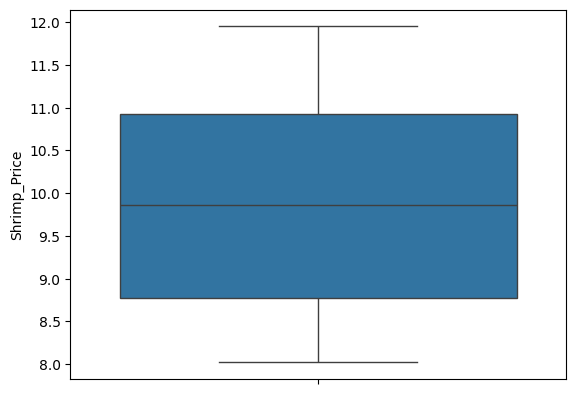

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize target variable to identify outliers
sns.boxplot(y)
plt.show()

# Remove outliers from the target variable based on the IQR method
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1
outlier_mask = (y >= (Q1 - 1.5 * IQR)) & (y <= (Q3 + 1.5 * IQR))
X = X[outlier_mask]
y = y[outlier_mask]

# Split the data again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Create pipelines for Random Forest and Gradient Boosting
pipelines = {
    'random_forest': Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)),
                               ('scaler', StandardScaler()),
                               ('regressor', RandomForestRegressor())]),
    'gradient_boosting': Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)),
                                   ('scaler', StandardScaler()),
                                   ('regressor', GradientBoostingRegressor())])
}

# Hyperparameter grids for each model
param_grids = {
    'random_forest': {'regressor__n_estimators': [100, 200], 'regressor__max_depth': [None, 10, 20]},
    'gradient_boosting': {'regressor__n_estimators': [100, 200], 'regressor__learning_rate': [0.01, 0.1, 0.2], 'regressor__max_depth': [3, 5, 7]}
}

best_model = None
best_score = float('inf')

# Perform GridSearchCV for each model and find the best one
for name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    cv_score = -grid_search.best_score_
    print(f"{name.capitalize()} Cross-validated Mean Squared Error: {cv_score}")
    
    if cv_score < best_score:
        best_score = cv_score
        best_model = grid_search.best_estimator_

# Perform cross-validation to evaluate the best model
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()
print(f"Cross-validated Mean Squared Error of best model: {cv_mse}")

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Calculate Mean Squared Error and R-squared on the test data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Random_forest Cross-validated Mean Squared Error: 1.6136946021376901
Gradient_boosting Cross-validated Mean Squared Error: 1.58037415214254
Cross-validated Mean Squared Error of best model: 1.568547110271587
Mean Squared Error: 1.6720214517333158
R-squared: -0.05757558760604087


In [2]:
df = pd.read_csv(r'C:/Users/Guest_user/Desktop/Pricing-main/shrimp.csv')

In [3]:
df.head(5)

,Sales Price,Change,month,Year,inflation(%),demand,COG
0,12.24,0.00,1,1991,13.87,4,12.14
1,12.90,5.39,2,1991,13.87,4,12.72
2,13.23,2.56,3,1991,13.87,3,12.82
3,13.23,0.00,4,1991,13.87,3,11.82
4,12.68,-3.84,5,1991,13.87,2,11.27


In [42]:
data.head(5)

,Sales Price,Climate_Conditions,Environmental_Events,Holiday_Festive_Demand,Seasonality,Extreme_Events,Global_Supply,Local_Demand,Fuel_Prices,Regulatory_Changes,...,Consumer_Income_Level,Exchange_Rates,Shrimp_Harvest,Inventory_Levels,COG,Sustainability_Certifications,Technological_Advancements,Month,Year,Day
0,9.50,Cold,Nothing,Medium,Spring,Hurricane,Low,High,3.43,Medium,...,Low,1.28,Good,Medium,1.51,Not Certified,Standard,1,2024,1
1,11.80,Warm,Nothing,High,Summer,Nothing,Medium,Low,2.91,High,...,High,1.08,Poor,Low,1.23,Not Certified,Standard,1,2024,8
2,10.93,Cold,Red Tide,Low,Fall,Flood,Low,Low,2.34,Low,...,Medium,1.09,Poor,Medium,1.18,Certified,Standard,1,2024,15
3,10.39,Mild,Algal Bloom,Medium,Winter,Hurricane,High,High,3.01,Low,...,High,1.43,Poor,Low,1.22,Not Certified,Advanced,1,2024,22
4,8.62,Warm,Algal Bloom,Low,Winter,Hurricane,High,Medium,2.93,High,...,Medium,1.47,Moderate,High,1.19,Not Certified,Advanced,1,2024,29


In [43]:
all_columns = set()
factors = []
influencing_factors = []
target_variable = []
# Select columns with numeric types only (integers and floats)
numeric_cols = data.select_dtypes(include=['float64', 'int64', 'int32']).columns
# Exclude datetime-like columns explicitly
non_date_numeric_cols = [col for col in numeric_cols if not pd.api.types.is_datetime64_any_dtype(data[col])]
all_columns.update(non_date_numeric_cols)

all_columns = list(all_columns)
if 'Sales Price' in all_columns:
    influencing_columns = [col for col in all_columns if col != 'Sales Price']
    factors = ['Sales Price'] + influencing_columns
    influencing_factors = influencing_columns
    target_variable = 'Sales Price'
else:
    factors = all_columns
    influencing_factors = all_columns
    target_variable = 'Sales Price'

In [35]:
from sklearn.linear_model import Ridge
def get_ridge_coefficients(df):
    X = df[influencing_factors]
    y = df[target_variable]
    model = Ridge()
    model.fit(X, y)
    coefs = model.coef_
    const_coef = model.intercept_
    return coefs, const_coef

In [44]:
factors

['Sales Price',
 'Fuel_Prices',
 'Exchange_Rates',
 'Day',
 'Month',
 'Year',
 'Competitor_Prices',
 'COG']

In [45]:
influencing_factors

['Fuel_Prices',
 'Exchange_Rates',
 'Day',
 'Month',
 'Year',
 'Competitor_Prices',
 'COG']

In [46]:
target_variable

'Sales Price'

In [47]:
coefficients = {}
coefs, const_coef = get_ridge_coefficients(data)
coefficients['product'] = dict(zip(influencing_factors, coefs))
coefficients['product']['const'] = const_coef

In [48]:
coefficients

{'product': {'Fuel_Prices': 0.19331349604096115,
  'Exchange_Rates': -0.5604797077156597,
  'Day': 0.021149927340117176,
  'Month': 0.013477024038686993,
  'Year': 0.02819372672245616,
  'Competitor_Prices': 0.05864351362833825,
  'COG': -0.1688528722633651,
  'const': -47.773171428046794}}

In [49]:
new_data = data[factors].copy()

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Split the data into features and target variable
X = new_data.drop(target_variable, axis=1)  # Replace 'target_column' with the name of your target column
y = new_data[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the ridge regression model
ridge_reg = Ridge(alpha=1.0)  # You can adjust the alpha parameter as needed
ridge_reg.fit(X_train, y_train)

# Now you can make predictions and evaluate the model
y_pred = ridge_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 1.9164086329751915
R-squared: -0.2121536981544001


In [52]:
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Create pipelines for Random Forest and Gradient Boosting
pipelines = {
    'random_forest': Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)),
                               ('scaler', StandardScaler()),
                               ('regressor', RandomForestRegressor())]),
    'gradient_boosting': Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)),
                                   ('scaler', StandardScaler()),
                                   ('regressor', GradientBoostingRegressor())])
}

# Hyperparameter grids for each model
param_grids = {
    'random_forest': {'regressor__n_estimators': [100, 200], 'regressor__max_depth': [None, 10, 20]},
    'gradient_boosting': {'regressor__n_estimators': [100, 200], 'regressor__learning_rate': [0.01, 0.1, 0.2], 'regressor__max_depth': [3, 5, 7]}
}

best_model = None
best_score = float('inf')

# Perform GridSearchCV for each model and find the best one
for name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    cv_score = -grid_search.best_score_
    print(f"{name.capitalize()} Cross-validated Mean Squared Error: {cv_score}")
    
    if cv_score < best_score:
        best_score = cv_score
        best_model = grid_search.best_estimator_

# Perform cross-validation to evaluate the best model
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()
print(f"Cross-validated Mean Squared Error of best model: {cv_mse}")

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Calculate Mean Squared Error and R-squared on the test data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Random_forest Cross-validated Mean Squared Error: 1.7910060014687503
Gradient_boosting Cross-validated Mean Squared Error: 1.7449782925016961
Cross-validated Mean Squared Error of best model: 1.7323165654731618
Mean Squared Error: 1.5988866874300418
R-squared: -0.01131688604914216
